<a href="https://colab.research.google.com/github/nahlatafi/skinnea/blob/main/example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries for manage the file in os and in the gdrive.
from google.colab import drive
import os

# For read the image
import glob as gb

# Libraries for do visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for do computational things
import numpy as np
import pandas as pd


import datetime

# For evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for Deep learning tasks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Inisialisasi
BASE_DIR = '/content/gdrive/MyDrive/new-skinnea-dataset'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
VAL_DIR = os.path.join(BASE_DIR, 'val')

In [4]:
def img_count_in_folder(FOLDER_PATH):  
  print('-'*70)
  for folder in os.listdir(FOLDER_PATH):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
  print('-'*70)

In [5]:
print(''*15+'Training Folder'+''*15)
img_count_in_folder(TRAIN_DIR)

Training Folder
----------------------------------------------------------------------
 345 gambar yang ditemukan di dalam folder Scabies Lyme
 220 gambar yang ditemukan di dalam folder Poison Ivy
 435 gambar yang ditemukan di dalam folder Atopic Dermatitis
----------------------------------------------------------------------


In [7]:
print(''*15+'Validation Folder'+''*15)
print(VAL_DIR)
img_count_in_folder(VAL_DIR)

Validation Folder
/content/gdrive/MyDrive/new-skinnea-dataset/val
----------------------------------------------------------------------
  40 gambar yang ditemukan di dalam folder Poison Ivy
  50 gambar yang ditemukan di dalam folder Atopic Dermatitis
  43 gambar yang ditemukan di dalam folder Scabies Lyme
----------------------------------------------------------------------


In [8]:
print(''*15+'TEST Folder'+''*15)
print(TEST_DIR)
img_count_in_folder(TEST_DIR)

TEST Folder
/content/gdrive/MyDrive/new-skinnea-dataset/test
----------------------------------------------------------------------
  65 gambar yang ditemukan di dalam folder Poison Ivy
 127 gambar yang ditemukan di dalam folder Atopic Dermatitis
 108 gambar yang ditemukan di dalam folder Scabies Lyme
----------------------------------------------------------------------


In [10]:
def show_images(img_files):
  plt.figure()
  fig = plt.figure(figsize=(10, 10))
  fig.patch.set_facecolor('xkcd:gray')

  for i in range(len(img_files)):
        plt.subplot(5,5,i+1)
        img=mpimg.imread(img_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(img_files[i].split("/")[7]) 
    
  plt.show()


def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if name.endswith(".jpg"):
              arr.append(os.path.join(root, name))
              break
    return arr

['/content/gdrive/MyDrive/new-skinnea-dataset/train/Scabies Lyme/Scabies Lyme (138).jpg', '/content/gdrive/MyDrive/new-skinnea-dataset/train/Poison Ivy/Poison Ivy (39).jpg', '/content/gdrive/MyDrive/new-skinnea-dataset/train/Atopic Dermatitis/Atopic Dermatitis (140).jpg']


<Figure size 640x480 with 0 Axes>

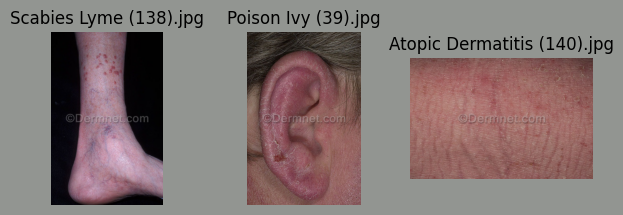

In [11]:
image_list = list_files(TRAIN_DIR)
print(image_list)
show_images(image_list)

In [12]:
# Image Augmentation > data validation hasn't been created

# Datagen for validation set dan training set
datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range = 45,
                             zoom_range = 0.1,
                             width_shift_range=0.15, 
                             shear_range= 0.1,
                             height_shift_range=0.15,
                             horizontal_flip=True,
                             vertical_flip= True,
                             fill_mode='nearest',
                             )

# ImageDataGenerator for test set
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Let's try with 224, 224
IMG_SIZE = (224, 224)

# Create train dataset
train_set = datagen.flow_from_directory(TRAIN_DIR, 
                                        class_mode='categorical', 
                                        batch_size= 64,
                                        target_size=IMG_SIZE,
                                        seed=42)

Found 1000 images belonging to 3 classes.


In [14]:
os.listdir(TRAIN_DIR)

['Scabies Lyme', 'Poison Ivy', 'Atopic Dermatitis']

In [15]:
os.listdir(VAL_DIR)

['Poison Ivy', 'Atopic Dermatitis', 'Scabies Lyme']

In [17]:
val_set= val_test_datagen.flow_from_directory(VAL_DIR, 
                                       class_mode='categorical',
                                       batch_size= 64,
                                       target_size=IMG_SIZE
                                       )

Found 133 images belonging to 3 classes.


In [18]:
test_set = val_test_datagen.flow_from_directory(TEST_DIR, 
                                       class_mode='categorical',
                                       batch_size= 64,
                                       target_size=IMG_SIZE
                                       )

Found 300 images belonging to 3 classes.


In [19]:
train_set.class_indices

{'Atopic Dermatitis': 0, 'Poison Ivy': 1, 'Scabies Lyme': 2}

In [20]:
val_set.class_indices

{'Atopic Dermatitis': 0, 'Poison Ivy': 1, 'Scabies Lyme': 2}

In [21]:
test_set.class_indices

{'Atopic Dermatitis': 0, 'Poison Ivy': 1, 'Scabies Lyme': 2}

In [23]:
# Check the image

# Create variabel X_train and y_train
X_train, y_train = train_set.next()

# Create variabel X_test and y_test
X_test, y_test = test_set.next()

# # Create variabel X_val and y_val
X_val, y_val = val_set.next()

In [24]:

class_dict = {v : k for k, v in train_set.class_indices.items()}

def plot_augmented_imgs(X, y):
  labels=[]
  y_label = np.argmax(y, axis=1)
  
  for label in y_label:
    labels.append(class_dict[label])

  for idx in range(0,10):
      plt.figure(figsize=(5, 5))
      plt.imshow(X_train[idx])
      plt.title(labels[idx])

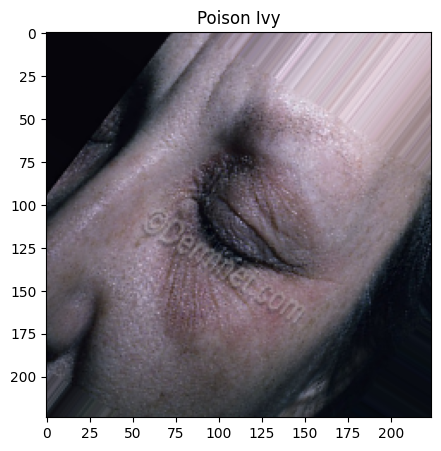

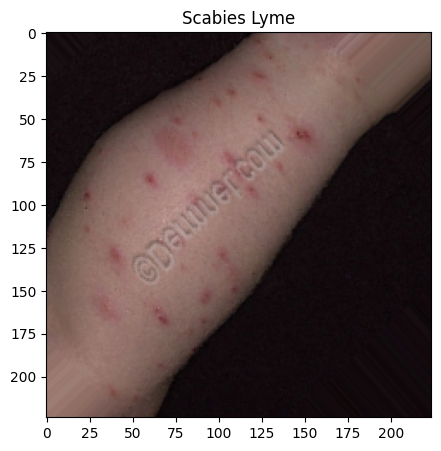

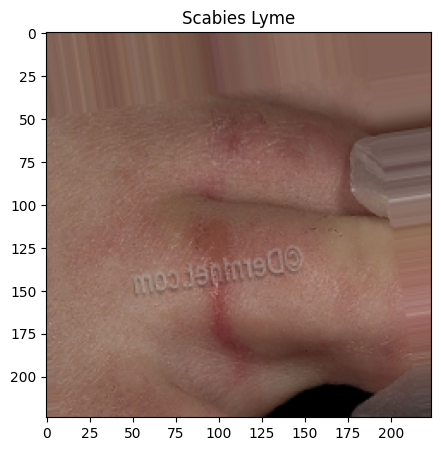

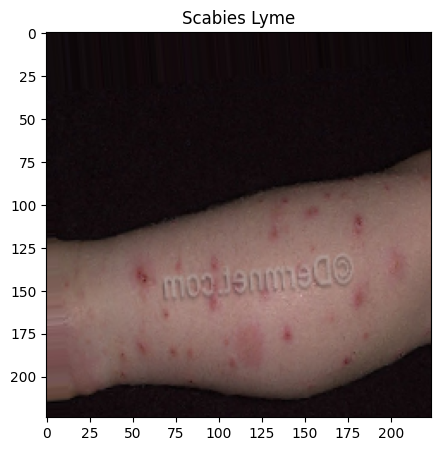

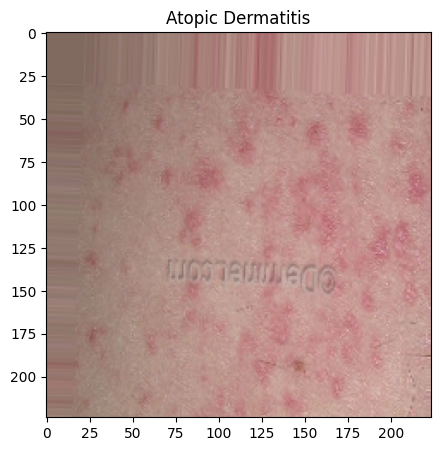

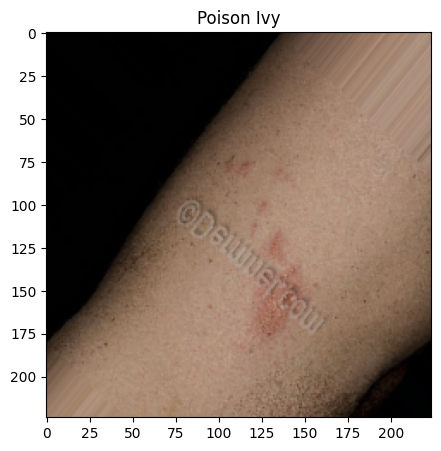

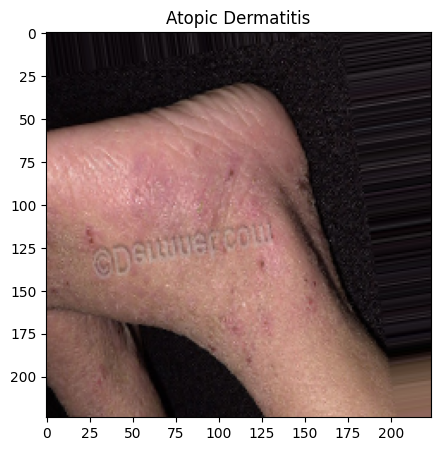

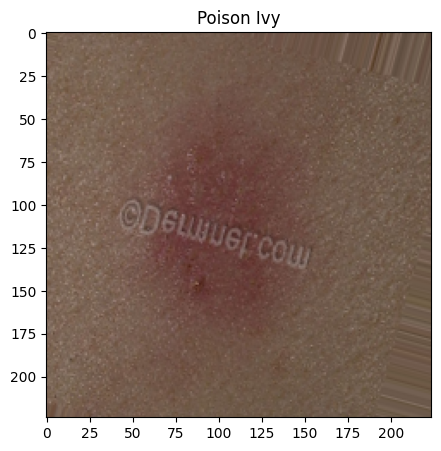

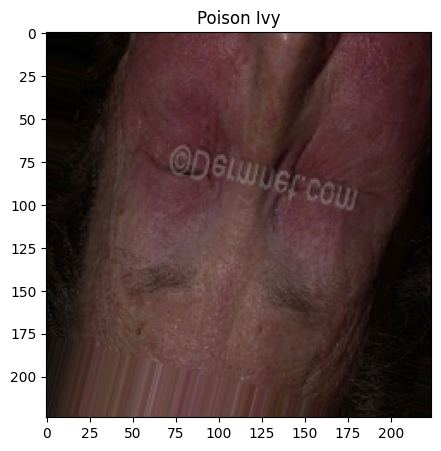

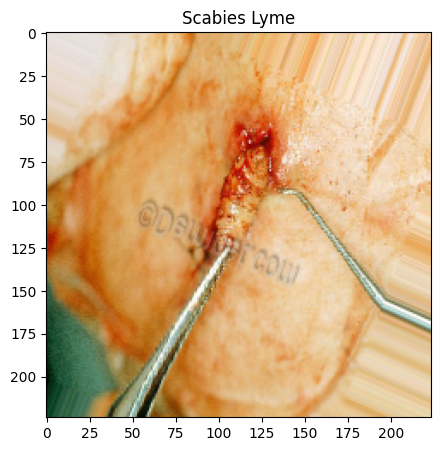

In [25]:

plot_augmented_imgs(X_train, y_train)

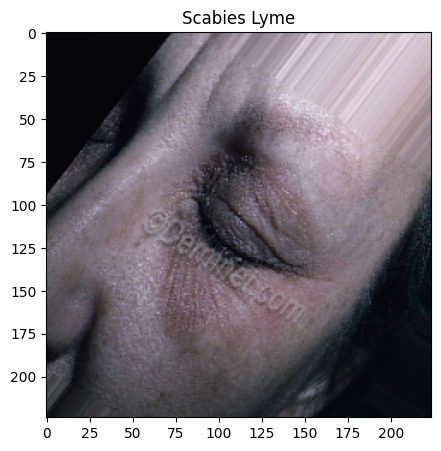

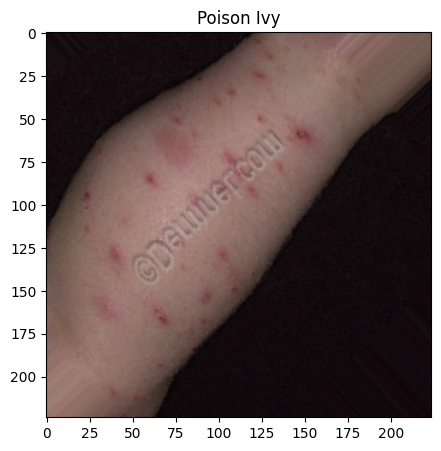

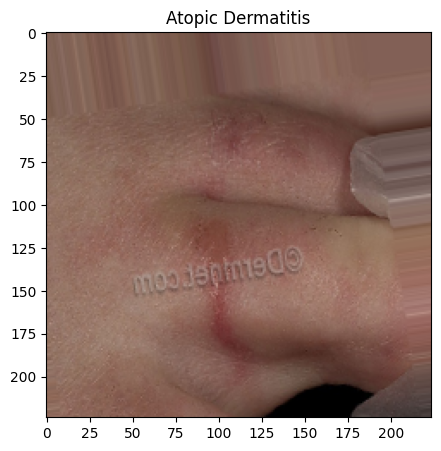

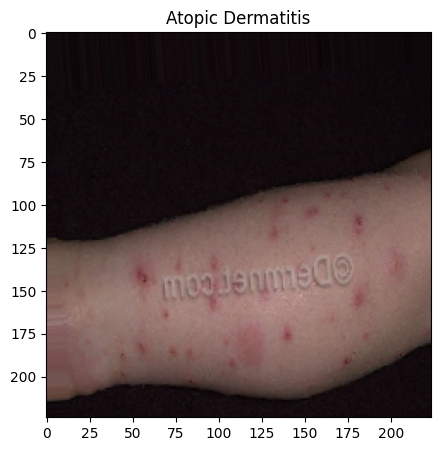

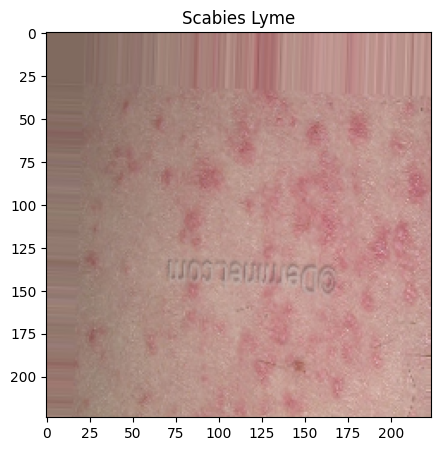

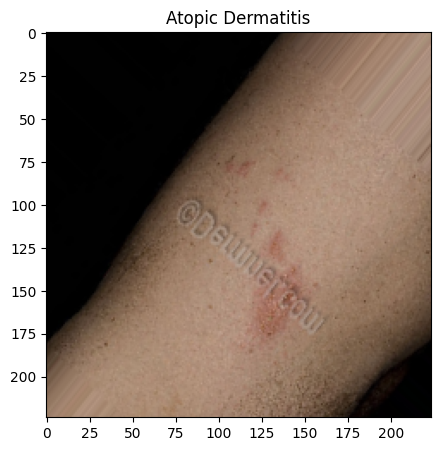

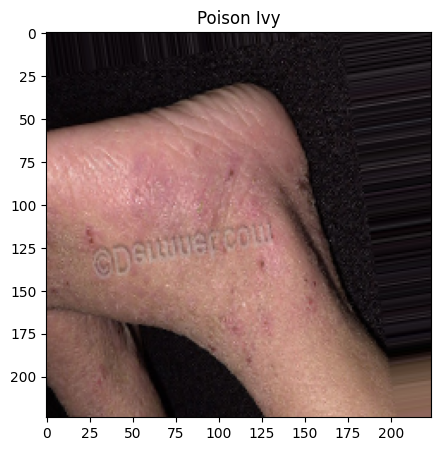

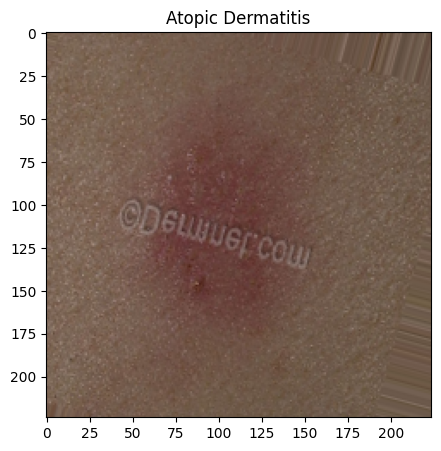

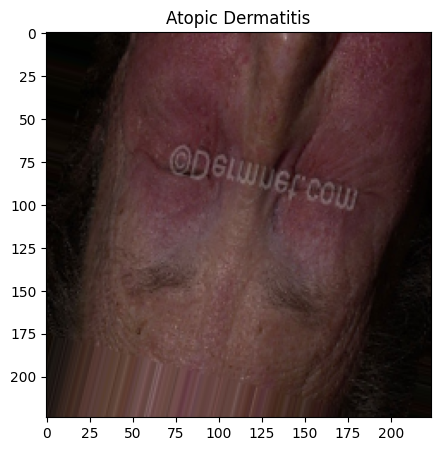

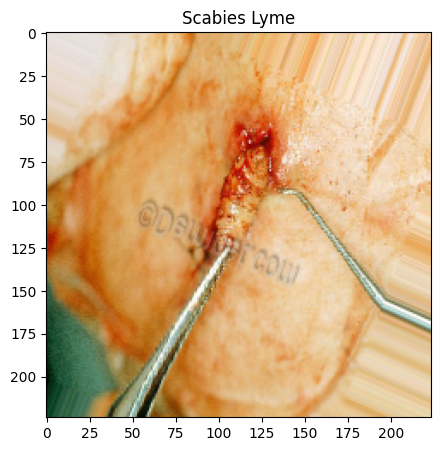

In [26]:
# Looks like we need another dataset screening guys? Before we build the model

plot_augmented_imgs(X_val, y_val)

In [27]:
# Build the model

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_lr=1e-8)
checkpoint_cb = ModelCheckpoint("current_best_model.h5", saved_best_only=True)
early_stop_cb = EarlyStopping(patience=10,monitor='val_loss', restore_best_weights= True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                                   histogram_freq=1)
# Clear any logs from previous runs
!rm -rf ./logs/ 

callbacks =[reduce_lr, checkpoint_cb, early_stop_cb, tensorboard_callback]

In [28]:
def evaluate_model(model, X, y):
  print('Loss of the model is - ', model.evaluate(X, y)[0])
  print('Accuracy of the model is - ', model.evaluate(X, y)[1]*100, '%')
  predict = model.predict(X)
  # print(predict)
  predict = np.argmax(predict, axis=1)
  predict = predict.reshape(1, -1)[0]
  y_label = np.argmax(y, axis=1)
  print(classification_report(y_label, predict, target_names =['Chickenpox', 'Melanoma', 'Scabies']))

  conf_matrix = confusion_matrix(y_label, predict)
  # print(conf_matrix)
  df_cm = pd.DataFrame(conf_matrix, index = [i for i in ('Chickenpox', 'Melanoma', 'Scabies')],
                  columns = [i for i in ('Chickenpox', 'Melanoma', 'Scabies')])
  plt.figure(figsize = (3, 3))
  sns.heatmap(df_cm, annot=True)

plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'orange')
  val_acc_plot, = plt.plot(epochs, val_acc, 'blue')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'orange')
  val_loss_plot, = plt.plot(epochs, val_loss, 'blue')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_hist(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)

<ipython-input-28-f671a6551013>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [29]:
# Define xception based Model using 224, 224 input image and pooling max
xception_based_model = Xception(weights='imagenet', input_shape=(224, 224 ,3), include_top=False, pooling='max')
x = xception_based_model.output

# Define the MLP for classification
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(3, activation='softmax')(x)

# Define the model
model = Model(inputs=xception_based_model.input, outputs = predictions)

# freeze all layer in xception_based_model for training process,
for layer in xception_based_model.layers:
  layer.trainable = False
optimizer=Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

83683744/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [31]:
# Train the model with 10 epochs
hist = model.fit(train_set, epochs=10, validation_data = val_set, verbose = 1, callbacks=callbacks,
          )

Epoch 1/10
16/16 [==============================] - 333s 21s/step - loss: 3.3556 - accuracy: 0.4740 - val_loss: 4.5502 - val_accuracy: 0.3985 - lr: 0.0010
Epoch 2/10
16/16 [==============================] - 312s 20s/step - loss: 3.2490 - accuracy: 0.5430 - val_loss: 3.3099 - val_accuracy: 0.5489 - lr: 0.0010
Epoch 3/10
16/16 [==============================] - 315s 20s/step - loss: 3.1690 - accuracy: 0.5290 - val_loss: 3.2123 - val_accuracy: 0.4436 - lr: 0.0010
Epoch 4/10
16/16 [==============================] - 328s 21s/step - loss: 3.0322 - accuracy: 0.5650 - val_loss: 3.5060 - val_accuracy: 0.4436 - lr: 0.0010
Epoch 5/10
16/16 [==============================] - 315s 20s/step - loss: 2.9418 - accuracy: 0.5820 - val_loss: 3.3881 - val_accuracy: 0.4511 - lr: 0.0010
Epoch 6/10
16/16 [==============================] - 324s 20s/step - loss: 2.8714 - accuracy: 0.5900 - val_loss: 3.3241 - val_accuracy: 0.5113 - lr: 0.0010
Epoch 7/10
16/16 [==============================] - 319s 20s/step - lo

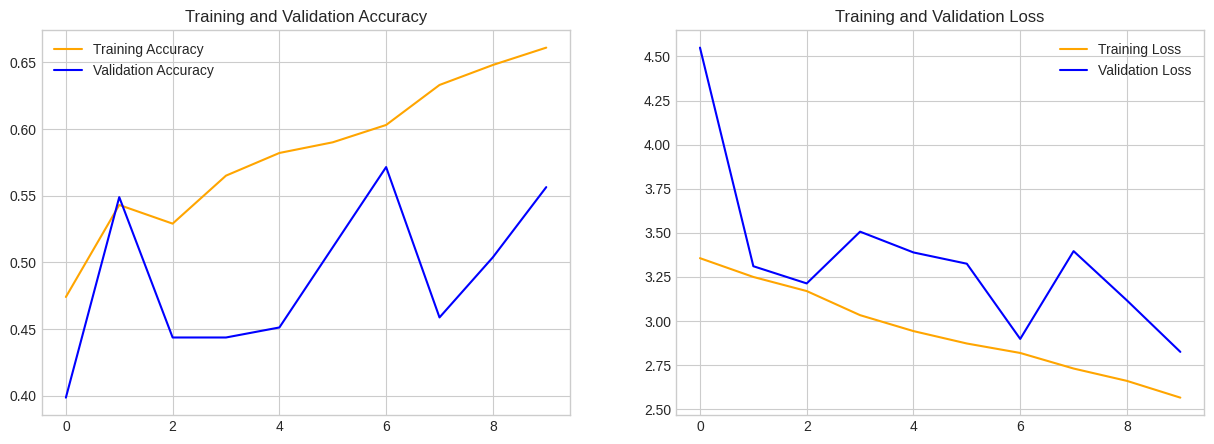

In [32]:
plot_hist(hist)

2/2 [==============================] - 16s 9s/step - loss: 2.6905 - accuracy: 0.6562
Loss of the model is -  2.6905453205108643
2/2 [==============================] - 18s 8s/step - loss: 2.6905 - accuracy: 0.6562
Accuracy of the model is -  65.625 %
2/2 [==============================] - 23s 12s/step
              precision    recall  f1-score   support

  Chickenpox       0.77      0.65      0.71        26
    Melanoma       0.82      0.45      0.58        20
     Scabies       0.52      0.89      0.65        18

    accuracy                           0.66        64
   macro avg       0.70      0.66      0.65        64
weighted avg       0.71      0.66      0.65        64



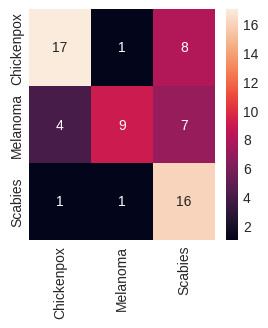

In [33]:
evaluate_model(model, X_test, y_test)

In [34]:
# include last 10 layers
optimizer=Adam()

for layer in xception_based_model.layers[-10:]:
  layer.trainable=True
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
# Train the model with 100 epochs
hist = model.fit(train_set, epochs=100, validation_data = val_set, verbose = 1, callbacks=callbacks,
          )

Epoch 1/100
16/16 [==============================] - 376s 23s/step - loss: 2.5832 - accuracy: 0.5800 - val_loss: 2.5159 - val_accuracy: 0.5263 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 368s 23s/step - loss: 2.1813 - accuracy: 0.6540 - val_loss: 2.6013 - val_accuracy: 0.5489 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 368s 23s/step - loss: 1.9884 - accuracy: 0.7290 - val_loss: 3.1089 - val_accuracy: 0.5414 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 368s 23s/step - loss: 1.8235 - accuracy: 0.7730 - val_loss: 2.2551 - val_accuracy: 0.6090 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 377s 24s/step - loss: 1.7649 - accuracy: 0.7750 - val_loss: 2.9272 - val_accuracy: 0.4737 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 366s 23s/step - loss: 1.6872 - accuracy: 0.7890 - val_loss: 2.9800 - val_accuracy: 0.5113 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 377s 24s/st

In [ ]:
plot_hist(hist)

In [ ]:
evaluate_model(model, X_test, y_test)

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/current_best_model.h5')
evaluate_model(best_model,  X_test, y_test)